## Kalman Filtering

The Kalman filter, named after its creator Rudolf E. Kalman, is a mathematical algorithm that provides recursive means to estimate the state of a system in a way that minimizes the mean squared error. It's widely used in robotics, economics, control systems, and computer vision


Basics of the Kalman Filter

Imagine you are in a car, driving through a fog. You can barely see the road, but you have a GPS system that tells you your speed and position. The problem is, this GPS isn't perfect; it sometimes gives noisy or inaccurate readings. How do you know where you really are and how fast you're going?

The Kalman filter provides an answer. It combines:

-- What the system (your car) predicts based on its model (known as the prediction step).

-- The noisy measurements it receives (the GPS readings, in this analogy) to produce an estimate that's statistically more reliable than either the prediction or the measurement on its own.


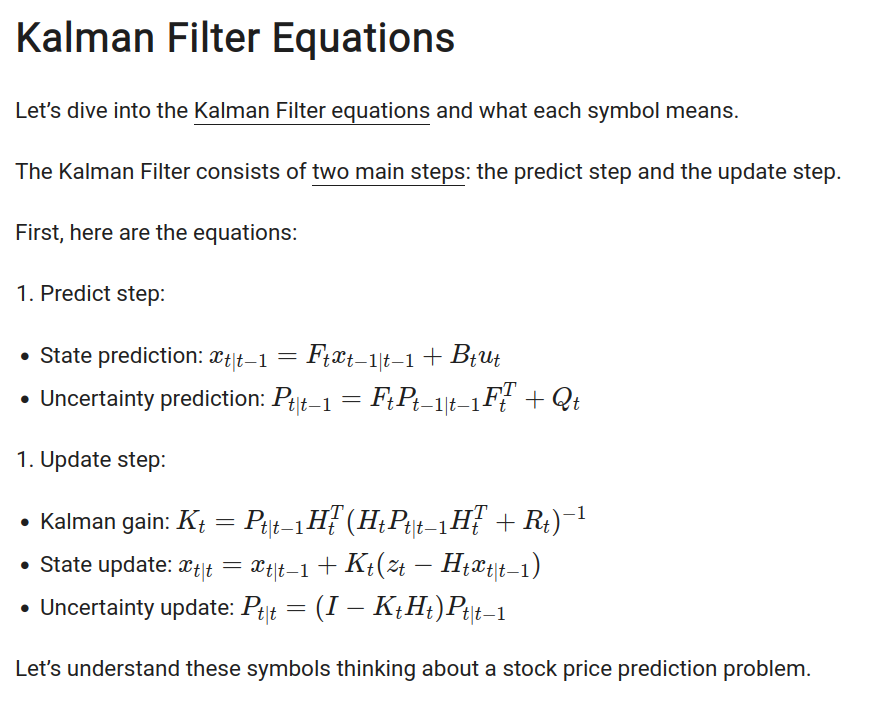

In the stock price modeling context, the goal of the Kalman Filter would be to estimate the underlying stock price trend, factoring in the influence of external factors and accounting for the noise in the recorded prices.

$x$: The state vector, which represents the true state of the stock price that we want to estimate.

$t$: The time step index, corresponding to different trading days or time periods.

$F_t$​: The state transition matrix, which models how the stock price evolves from time step $t−1$ to $t$ without taking into account external factors (e.g., market trends or news events).

$B_t$​: The control input matrix, used to incorporate the effect of any external factors utut​ (e.g., financial news or announcements affecting the stock price).

$u_t$: The control input vector, containing the external factors impacting the stock price.

$P$: The uncertainty (covariance) matrix, which quantifies our uncertainty about the estimated stock price.

$Q_t$​: The process noise covariance matrix, representing the estimation error caused by our simplified model of the stock price dynamics.

$H_t$​: The observation matrix, which models how the true stock price is transformed into the observed stock price (e.g., recorded price at market close).

$K_t$​: The Kalman gain, which determines how much we trust the new observation (e.g., daily closing price) relative to our prediction.

$z_t$​: The observation (measurement) vector, containing the recorded stock prices.

$R_t$​: The observation noise covariance matrix, representing the measurement noise in the observed stock prices (e.g., fluctuations during a trading day).

$I$: The identity matrix.

Now, let’s walk through the step-by-step filtering process:

- Predict the stock price $x_{t∣t−1}$ and uncertainty $P_{t∣t−1}$ at time step $t$ based on the previous stock price and uncertainty at time step $t−1$.
    
- Obtain a new recorded stock price $z_t$ at time step $t$.

- Calculate the Kalman gain $K_t$ to determine how much trust to place in the new recorded price compared to our prediction.

- Update the stock price estimate $x_{t∣t​}$ by combining the predicted price, Kalman gain, and new recorded price.

- Update the uncertainty estimate $P_{t∣t}$ to reflect the reduced uncertainty after incorporating the new recorded stock price.

This process is repeated at each time step, allowing the Kalman Filter to continuously predict and update the state estimate and uncertainty with the incoming measurements.

In [ ]:
!pip install opencv-python matplotlib

Now, let's import the necessary modules for our tutorial.

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Implementing Kalman Filter with OpenCV

OpenCV provides a convenient KalmanFilter class that lets us implement the Kalman filter without getting bogged down in the mathematical details. For this demonstration, we'll simulate a simple 2D motion of an object and use the Kalman filter to estimate its position.

In [ ]:
# Initialize the Kalman filter
kalman_2d = cv2.KalmanFilter(4, 2)
kalman_2d.measurementMatrix = np.array([[1, 0, 0, 0], [0, 1, 0, 0]], np.float32)
kalman_2d.transitionMatrix = np.array([[1, 0, 1, 0], [0, 1, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1]], np.float32)
kalman_2d.processNoiseCov = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]], np.float32) * 1e-4


Great! Now that our Kalman filter is initialized:

-- The state of our system is represented by a 4x1 matrix:
$[x,y,\dot{x},\dot{y}]$, where $x$ and $y$ are the 2D coordinates, and $\dot{x}$
and $\dot{y}$ represent the velocities in the x and y directions, respectively.

-- The "measurementMatrix" relates the state to the measurements. In our case, we're only measuring the position, not the velocity.

-- The transitionMatrix represents the state transition model. For simplicity, we assume constant velocity.

-- The processNoiseCov represents the noise associated with our process.

## Simulating Object Motion and Applying Kalman Filter

We'll simulate an object moving in a straight line with some added noise to its measurements. As the object moves, we'll apply the Kalman filter to estimate its true position.

In [ ]:
# Simulation parameters
num_steps = 200
noise_std = 0.2
x_vals = np.linspace(0, 4 * np.pi, num_steps)
true_path = np.array([x_vals, np.sin(x_vals)]).T  # Sinusoidal path

# Placeholder for results
predictions = []
measurements = []

# Simulation parameters
initial_state = [0, 0, 1, 1]  # Initial position and velocity
noise_std = 0.2  # Standard deviation of noise
num_steps = 200  # Number of simulation steps

for point in true_path:
    # Simulate noisy measurement
    measurement = point + np.random.normal(0, noise_std, 2)
    measurements.append(measurement)

    # Kalman predict and correct steps
    prediction = kalman_2d.predict()
    predictions.append(prediction)
    kalman_2d.correct(np.array([[measurement[0]], [measurement[1]]], np.float32))

Now that the simulation has run successfully:

We have 200 predicted states, each represented by a $4\times1$ matrix.
We also have 200 noisy measurements, each represented by a $2\times1$ matrix.

## Visualization with Matplotlib

Let's visualize the true path of the object, the noisy measurements, and the path estimated by the Kalman filter.

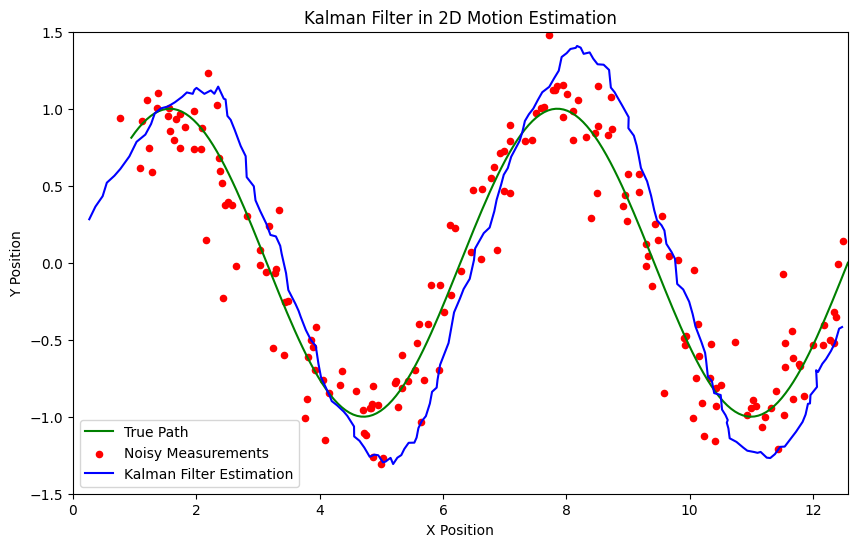

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, 4 * np.pi)
ax.set_ylim(-1.5, 1.5)
ax.set_title("Kalman Filter in 2D Motion Estimation")
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")

# Exclude the first 10 points
exclude_first_n = 15

# Plotting the true path, noisy measurements, and Kalman filter estimations
ax.plot(true_path[exclude_first_n:, 0], true_path[exclude_first_n:, 1], 'g-', label="True Path")  # Exclude first 10 points
ax.scatter(np.array(measurements)[exclude_first_n:, 0], np.array(measurements)[exclude_first_n:, 1], c='red', s=20, label="Noisy Measurements")  # Exclude first 10 points
ax.plot(np.array(predictions)[exclude_first_n:, 0, 0], np.array(predictions)[exclude_first_n:, 1, 0], 'b-', label="Kalman Filter Estimation")  # Exclude first 10 points
ax.legend()
plt.show()


Remember:

- True Path: This is the actual path taken by the object (though we don't have this in real-world scenarios). The green line represents the True Path. This is the actual trajectory of the object. In real-world scenarios, we wouldn't know this unless we had a perfect measuring system (which is typically not the case).

- Noisy Measurements: These are the readings we get from our sensors, which are corrupted by noise. The red dots represent the Noisy Measurements. These are what our hypothetical sensors (with their inherent inaccuracies) are recording as the object's position.

- Kalman Filter Estimations: These are the positions estimated by the Kalman filter, which ideally should be close to the true path. The blue dashed line represents the Kalman Filter Estimation. By taking into account both the system's prediction and the noisy measurements, the Kalman filter provides a more accurate and smoother estimate of the object's path.



## Why Use the Kalman Filter?

From the visualization, you might be asking:

**Why not just use the true path? Why bother with the Kalman filter? **

In real-world scenarios, the true path (green line) is unknown to us. We rely on sensors to provide measurements, and these sensors are seldom perfect. They are affected by various sources of noise — from environmental disturbances to electronic noise. The Kalman filter helps us make the best possible estimate of the true state of the system by combining our system model's predictions with sensor measurements.

## Limitations and Considerations

While the Kalman filter is powerful, it's essential to understand its limitations:

- Linear Assumption: The standard Kalman filter assumes that the system is linear. For non-linear systems, variations like the Extended Kalman Filter (EKF) or the Unscented Kalman Filter (UKF) are used. Also consider exploring other options like Particle Filters, which are specifically designed to handle intricate situations.
    
- Noise Characteristics: The filter assumes that the process and measurement noises are Gaussian and white. This might not always be the case in real-world applications.

- Model Accuracy: The accuracy of the Kalman filter's estimates heavily relies on the accuracy of the system model. If the model is wrong, the Kalman filter's predictions will also be off.

## Robust Kalman filtering for vehicle tracking

We will try to pinpoint the location of a moving vehicle with high accuracy from noisy sensor data. We’ll do this by modeling the vehicle state as a discrete-time linear dynamical system. Standard Kalman filtering can be used to approach this problem when the sensor noise is assumed to be Gaussian. We’ll use robust Kalman filtering to get a more accurate estimate of the vehicle state for a non-Gaussian case with outliers.

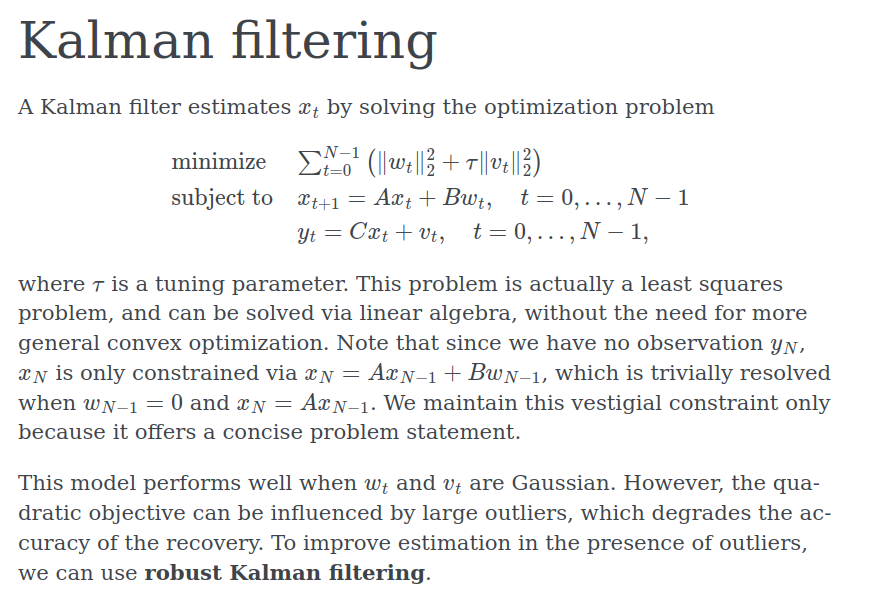

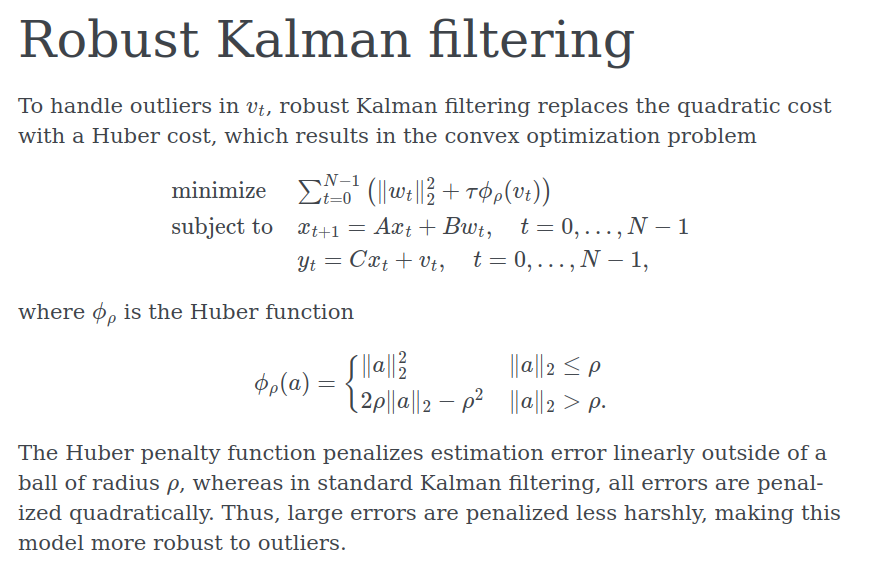

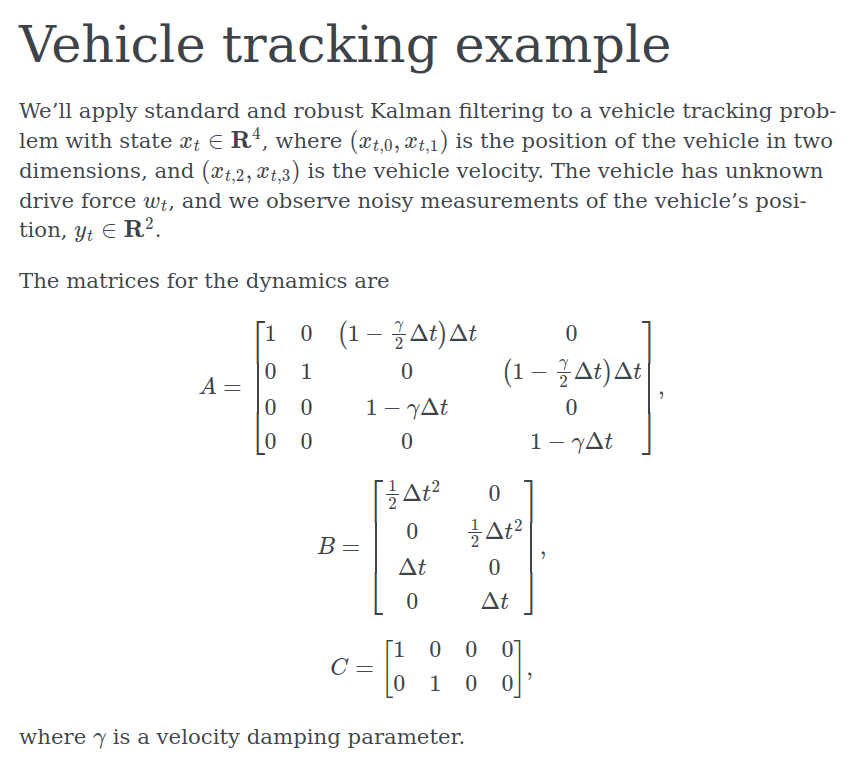

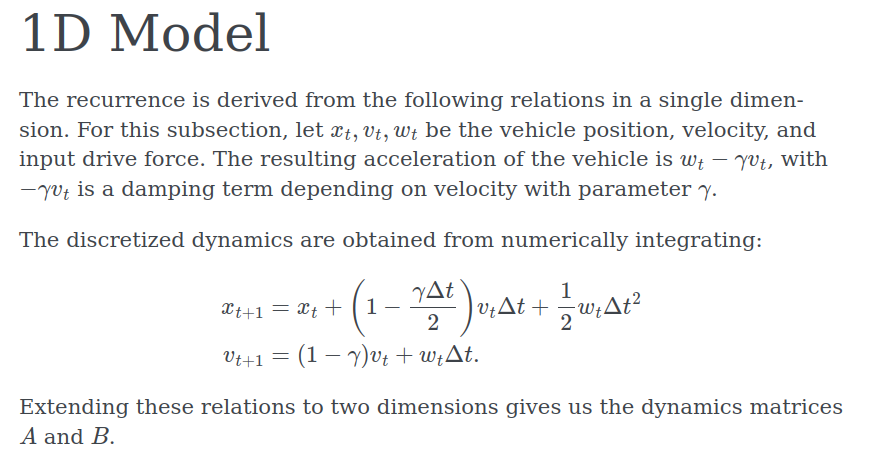

## Helper Functions

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def plot_state(t,actual, estimated=None):
    '''
    plot position, speed, and acceleration in the x and y coordinates for
    the actual data, and optionally for the estimated data
    '''
    trajectories = [actual]
    if estimated is not None:
        trajectories.append(estimated)

    fig, ax = plt.subplots(3, 2, sharex='col', sharey='row', figsize=(8,8))
    for x, w in trajectories:
        ax[0,0].plot(t,x[0,:-1])
        ax[0,1].plot(t,x[1,:-1])
        ax[1,0].plot(t,x[2,:-1])
        ax[1,1].plot(t,x[3,:-1])
        ax[2,0].plot(t,w[0,:])
        ax[2,1].plot(t,w[1,:])

    ax[0,0].set_ylabel('x position')
    ax[1,0].set_ylabel('x velocity')
    ax[2,0].set_ylabel('x input')

    ax[0,1].set_ylabel('y position')
    ax[1,1].set_ylabel('y velocity')
    ax[2,1].set_ylabel('y input')

    ax[0,1].yaxis.tick_right()
    ax[1,1].yaxis.tick_right()
    ax[2,1].yaxis.tick_right()

    ax[0,1].yaxis.set_label_position("right")
    ax[1,1].yaxis.set_label_position("right")
    ax[2,1].yaxis.set_label_position("right")

    ax[2,0].set_xlabel('time')
    ax[2,1].set_xlabel('time')

def plot_positions(traj, labels, axis=None,filename=None):
    '''
    show point clouds for true, observed, and recovered positions
    '''
    matplotlib.rcParams.update({'font.size': 14})
    n = len(traj)

    fig, ax = plt.subplots(1, n, sharex=True, sharey=True,figsize=(12, 5))
    if n == 1:
        ax = [ax]

    for i,x in enumerate(traj):
        ax[i].plot(x[0,:], x[1,:], 'ro', alpha=.1)
        ax[i].set_title(labels[i])
        if axis:
            ax[i].axis(axis)

    if filename:
        fig.savefig(filename, bbox_inches='tight')

## Problem Data

We generate the data for the vehicle tracking problem.
We’ll have, $w_t$ a standard Gaussian, and $v_t$ a standard Gaussian, except 20% of the points will be outliers with $\sigma=20$

Below, we set the problem parameters and define the matrices $A,B,C$

In [ ]:
n = 1000 # number of timesteps
T = 50 # time will vary from 0 to T with step delt
ts, delt = np.linspace(0,T,n,endpoint=True, retstep=True)
gamma = .05 # damping, 0 is no damping

A = np.zeros((4,4))
B = np.zeros((4,2))
C = np.zeros((2,4))

A[0,0] = 1
A[1,1] = 1
A[0,2] = (1-gamma*delt/2)*delt
A[1,3] = (1-gamma*delt/2)*delt
A[2,2] = 1 - gamma*delt
A[3,3] = 1 - gamma*delt

B[0,0] = delt**2/2
B[1,1] = delt**2/2
B[2,0] = delt
B[3,1] = delt

C[0,0] = 1
C[1,1] = 1

## Simulation

We plot the position, velocity, and system input in both dimensions as a function of time. We also plot the sets of true and observed vehicle positions.

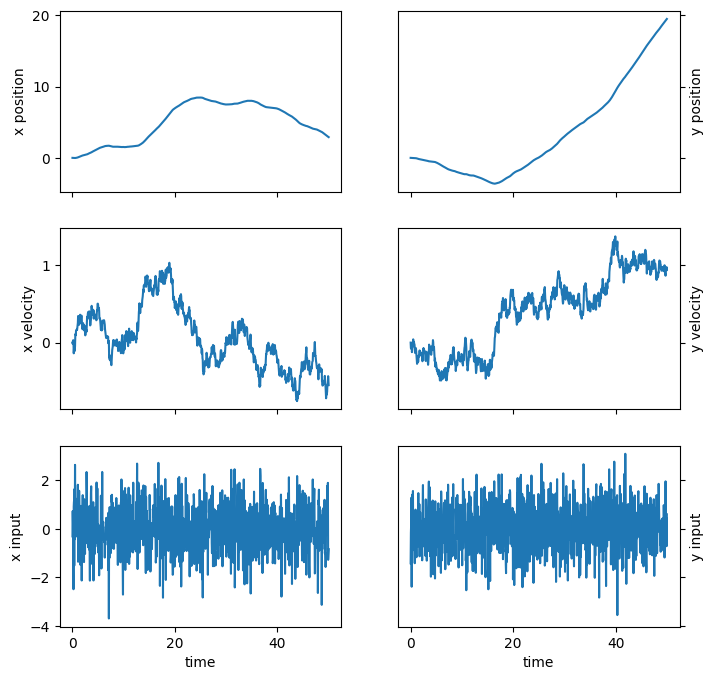

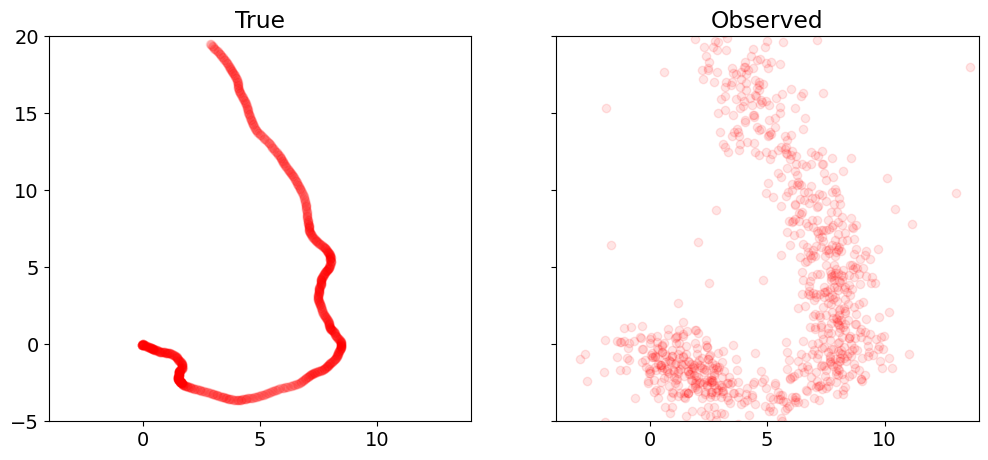

In [ ]:
sigma = 20
p = .20
np.random.seed(6)

x = np.zeros((4,n+1))
x[:,0] = [0,0,0,0]
y = np.zeros((2,n))

# generate random input and noise vectors
w = np.random.randn(2,n)
v = np.random.randn(2,n)

# add outliers to v
np.random.seed(0)
inds = np.random.rand(n) <= p
v[:,inds] = sigma*np.random.randn(2,n)[:,inds]

# simulate the system forward in time
for t in range(n):
    y[:,t] = C.dot(x[:,t]) + v[:,t]
    x[:,t+1] = A.dot(x[:,t]) + B.dot(w[:,t])

x_true = x.copy()
w_true = w.copy()

plot_state(ts,(x_true,w_true))
plot_positions([x_true,y], ['True', 'Observed'],[-4,14,-5,20],'rkf1.pdf')

## Kalman filtering recovery

The code below solves the standard Kalman filtering problem using CVXPY.
We plot and compare the true and recovered vehicle states.
Note that the recovery is distorted by outliers in the measurements.

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 2445 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 2446 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for m

                                     CVXPY                                     
                                     v1.3.4                                    
(CVXPY) May 08 01:13:02 PM: Your problem has 8004 variables, 2000 constraints, and 0 parameters.
(CVXPY) May 08 01:13:03 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 08 01:13:03 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 08 01:13:03 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 08 01:13:03 PM: Compiling problem (target solver=OSQP).
(CVXPY) May 08 01:13:03 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStu

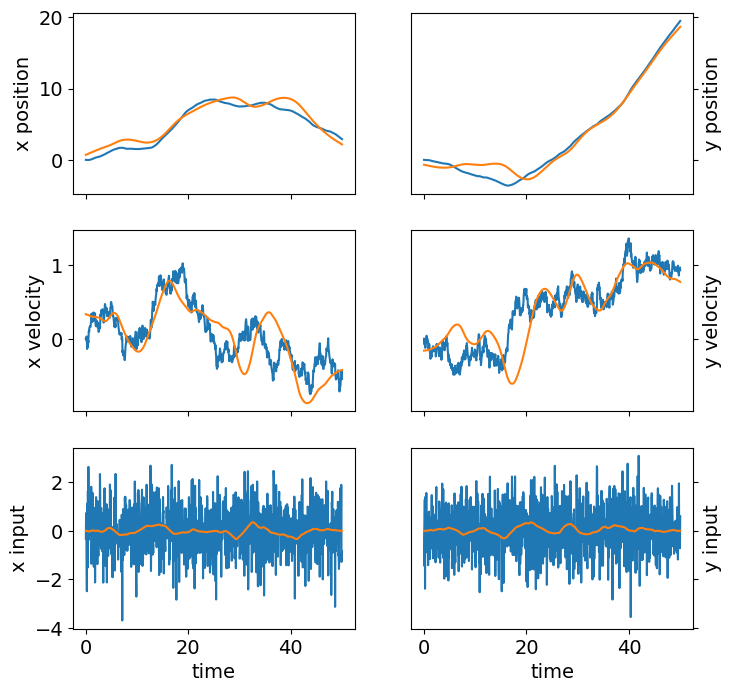

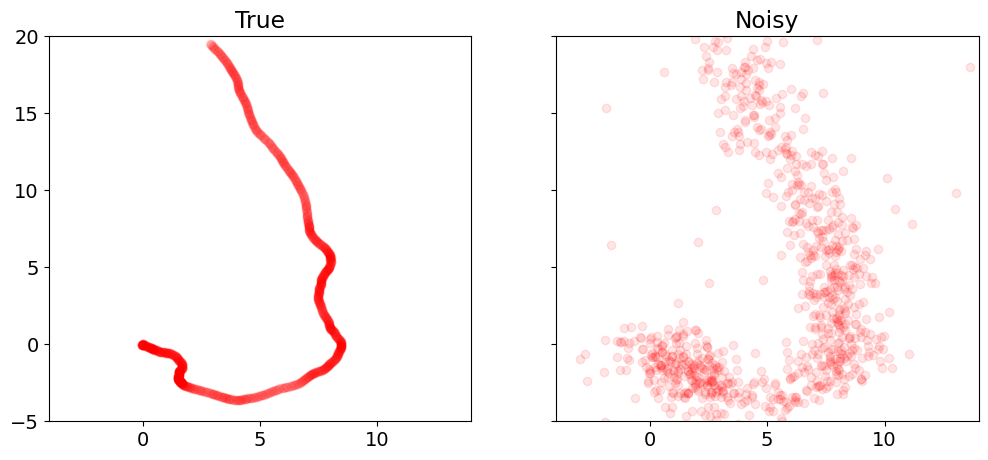

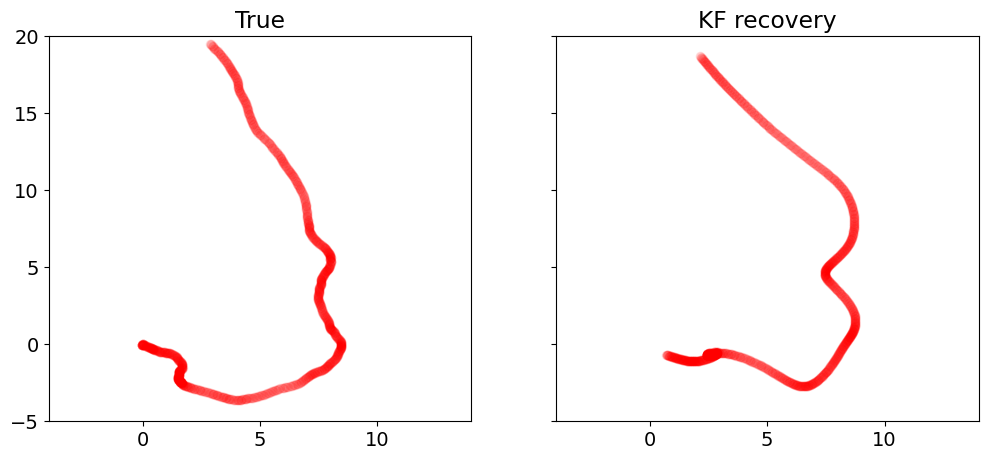

In [ ]:
%%time
import cvxpy as cp

x = cp.Variable(shape=(4, n+1))
w = cp.Variable(shape=(2, n))
v = cp.Variable(shape=(2, n))

tau = .08

obj = cp.sum_squares(w) + tau*cp.sum_squares(v)
obj = cp.Minimize(obj)

constr = []
for t in range(n):
    constr += [ x[:,t+1] == A*x[:,t] + B*w[:,t] ,
                y[:,t]   == C*x[:,t] + v[:,t]   ]

cp.Problem(obj, constr).solve(verbose=True)

x = np.array(x.value)
w = np.array(w.value)

plot_state(ts,(x_true,w_true),(x,w))
plot_positions([x_true,y], ['True', 'Noisy'], [-4,14,-5,20])
plot_positions([x_true,x], ['True', 'KF recovery'], [-4,14,-5,20], 'rkf2.pdf')

print("optimal objective value: {}".format(obj.value))

## Robust Kalman filtering recovery

Here we implement robust Kalman filtering with CVXPY. We get a better recovery than the standard Kalman filtering, which can be seen in the plots below.

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 5445 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 5446 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for m

                                     CVXPY                                     
                                     v1.3.4                                    
(CVXPY) May 08 01:13:15 PM: Your problem has 8004 variables, 2000 constraints, and 0 parameters.
(CVXPY) May 08 01:13:15 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 08 01:13:15 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 08 01:13:15 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 08 01:13:15 PM: Compiling problem (target solver=ECOS).
(CVXPY) May 08 01:13:15 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffi

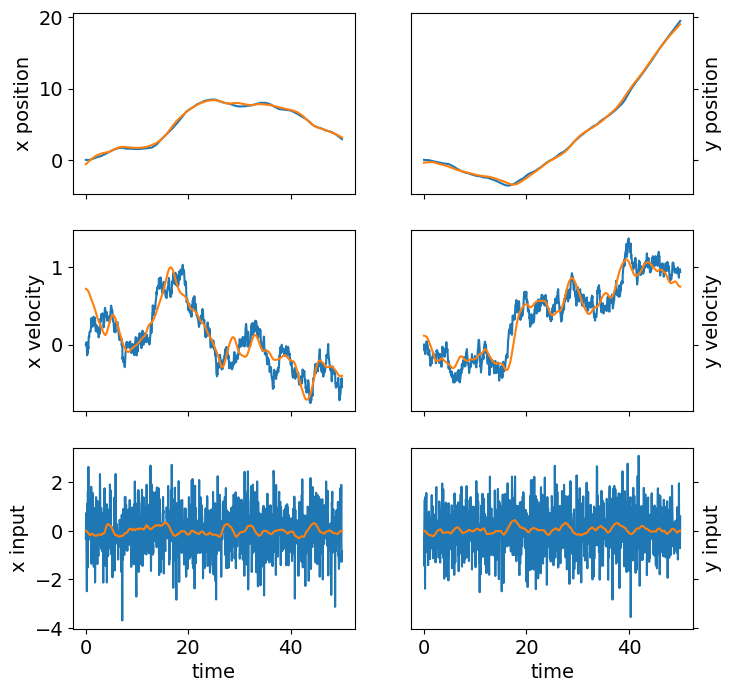

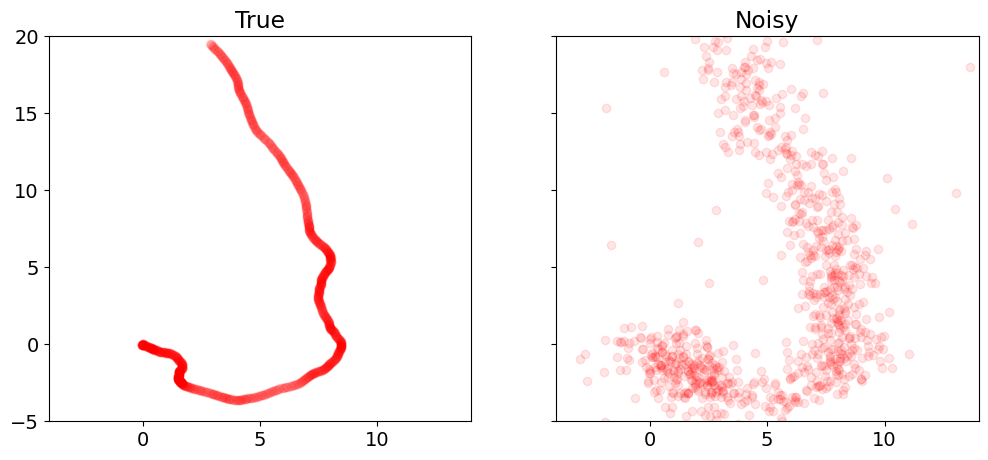

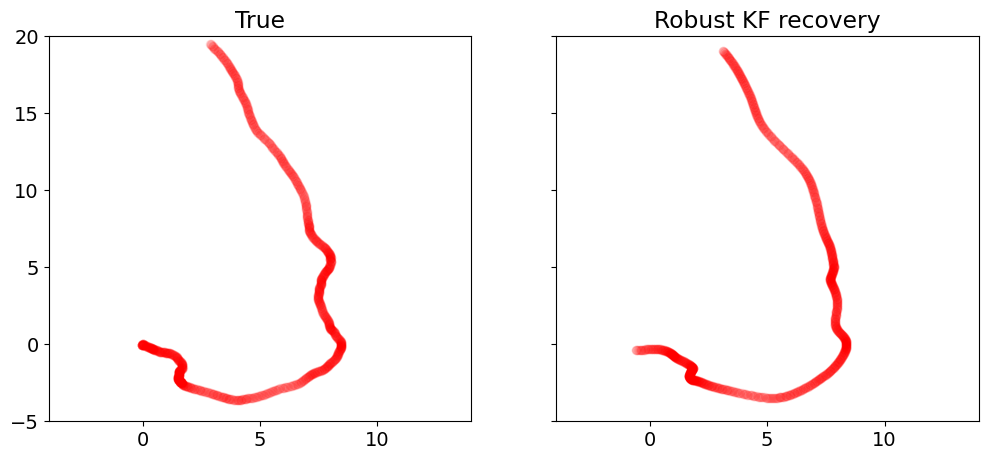

In [ ]:
%%time
import cvxpy as cp

x = cp.Variable(shape=(4, n+1))
w = cp.Variable(shape=(2, n))
v = cp.Variable(shape=(2, n))

tau = 2
rho = 2

obj = cp.sum_squares(w)
obj += cp.sum([tau*cp.huber(cp.norm(v[:,t]),rho) for t in range(n)])
obj = cp.Minimize(obj)

constr = []
for t in range(n):
    constr += [ x[:,t+1] == A*x[:,t] + B*w[:,t] ,
                y[:,t]   == C*x[:,t] + v[:,t]   ]

cp.Problem(obj, constr).solve(verbose=True)

x = np.array(x.value)
w = np.array(w.value)

plot_state(ts,(x_true,w_true),(x,w))
plot_positions([x_true,y], ['True', 'Noisy'], [-4,14,-5,20])
plot_positions([x_true,x], ['True', 'Robust KF recovery'], [-4,14,-5,20],'rkf3.pdf')

print("optimal objective value: {}".format(obj.value))

## CHECK-OUT:

https://forecastegy.com/posts/kalman-filter-for-time-series-forecasting-in-python/